In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
first_row = session.query(Measurement).order_by(Measurement.date.desc()).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1cec2a22eb0>,
 'id': 2724,
 'prcp': 0.0,
 'tobs': 81.0,
 'date': '2017-08-23',
 'station': 'USC00519397'}

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.read_sql("SELECT date, prcp FROM Measurement WHERE date >= '2016-08-23' ORDER BY date",engine.connect()).set_index('date').dropna()
precip_df
# Sort the dataframe by date
# See Query for the sort

# Use Pandas Plotting with Matplotlib to plot the data




,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [24]:
bars_in_dates = precip_df["prcp"]
dates = precip_df.index
x_axis = np.arange(len(bars_in_dates))

In [25]:
dates

Index(['2016-08-23', '2016-08-23', '2016-08-23', '2016-08-23', '2016-08-23',
       '2016-08-23', '2016-08-24', '2016-08-24', '2016-08-24', '2016-08-24',
       ...
       '2017-08-21', '2017-08-21', '2017-08-21', '2017-08-22', '2017-08-22',
       '2017-08-22', '2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23'],
      dtype='object', name='date', length=2021)

Text(0, 0.5, 'Precipitation')

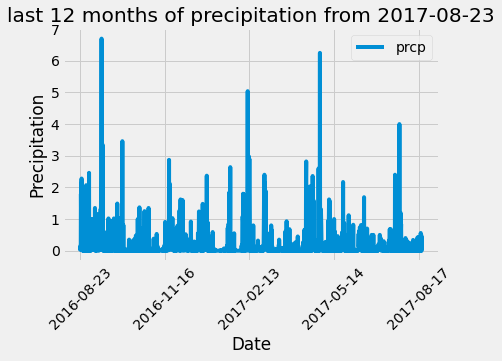

In [45]:
precip_df.plot(rot=45)
plt.title("last 12 months of precipitation from 2017-08-23")
plt.xlabel("Date")
plt.ylabel("Precipitation")

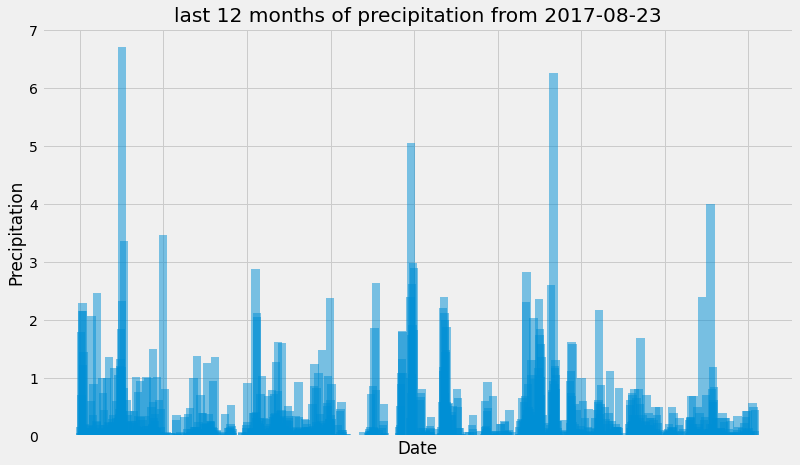

In [39]:
plt.figure(figsize=(12,7))
plt.bar(x_axis, bars_in_dates, width=25, alpha=0.5, align="center")
plt.tick_params(
    axis='x',         
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 
plt.title("last 12 months of precipitation from 2017-08-23")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.show()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
first_row = session.query(Station).order_by(Station.station.desc()).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1cec2e286d0>,
 'elevation': 19.5,
 'latitude': 21.33556,
 'station': 'USC00519523',
 'id': 6,
 'longitude': -157.71139,
 'name': 'WAIMANALO EXPERIMENTAL FARM, HI US'}

In [15]:
# Design a query to calculate the total number stations in the dataset
pd.read_sql("SELECT COUNT(station) AS total_stations FROM Station",engine.connect())

,total_stations
0,9


In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
pd.read_sql("SELECT station, COUNT(id) AS total_reports FROM Measurement GROUP BY station ORDER BY total_reports DESC",engine.connect())


,station,total_reports
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
pd.read_sql("SELECT station, tobs FROM Measurement WHERE station = 'USC00519281'",engine.connect()).describe()

,tobs
count,2772.000000
mean,71.663781
std,4.357642
min,54.000000
25%,69.000000
50%,72.000000
75%,74.000000
max,85.000000


In [40]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_df = pd.read_sql("SELECT date, tobs FROM Measurement WHERE station = 'USC00519281' and date >= '2016-08-18' ORDER BY date",engine.connect())
temp_df

,date,tobs
0,2016-08-18,80.0
1,2016-08-19,79.0
2,2016-08-20,81.0
3,2016-08-21,79.0
4,2016-08-22,78.0
...,...,...
352,2017-08-14,77.0
353,2017-08-15,77.0
354,2017-08-16,76.0
355,2017-08-17,76.0


Text(0, 0.5, 'Frequency')

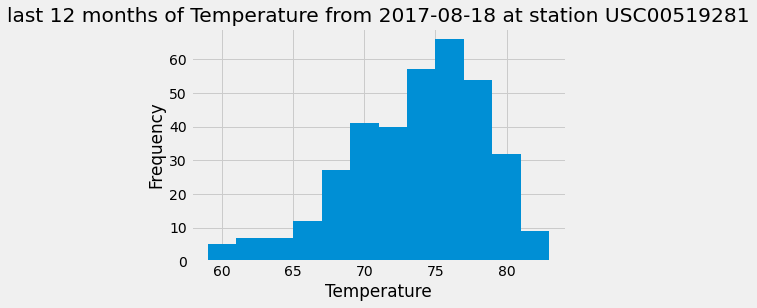

In [50]:
temp_df.hist(bins=12)
plt.title("last 12 months of Temperature from 2017-08-18 at station USC00519281")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Close session

In [19]:
# Close Session
session.close()